# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [1]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [13]:
L = 0.5 #metre
Rw = 0.3 #metre

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [5]:
def draw_wheelchair(x, y, theta):
    r1 = np.array([x + Rw*np.sin(theta), y - Rw*np.cos(theta)])
    r2 = np.array([r1[0]+L*np.cos(theta), r1[1]+ L*sin(theta)])
    r4 = np.array([x - Rw*np.sin(theta), y + Rw*np.cos(theta)])
    r3 = np.array([r4[0]+L*np.cos(theta), r4[1]+ L*sin(theta)])
    c1 = np.array([x + L*np.sin(theta), y - L*np.cos(theta)])
    c2 = np.array([c1[0]+L*np.cos(theta), c1[1]+ L*sin(theta)])
    c4 = np.array([x , y ])
    c3 = np.array([c4[0]+L*np.cos(theta), c4[1]+ L*sin(theta)])    
    # Plot the wheelchair frame
    #plt.plot(e1,e2,'ko')
    plot([c1[0], c2[0]], [c1[1], c2[1]], 'k')
    plot([c2[0], c3[0]], [c2[1], c3[1]], 'k')
    plot([c3[0], c4[0]], [c3[1], c4[1]], 'k')
    plot([c4[0], c1[0]], [c4[1], c1[1]], 'k')    
    plot([r1[0], r4[0]], [r1[1], r4[1]], 'k',linewidth=10)
    plot([r2[0], r3[0]], [r2[1], r3[1]], 'k',linewidth=10)

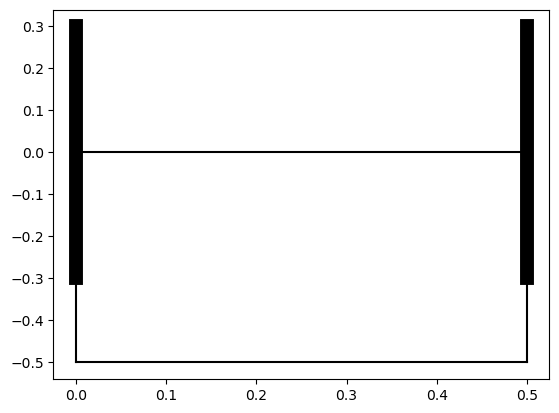

In [6]:
draw_wheelchair(0,0,0)

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [7]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

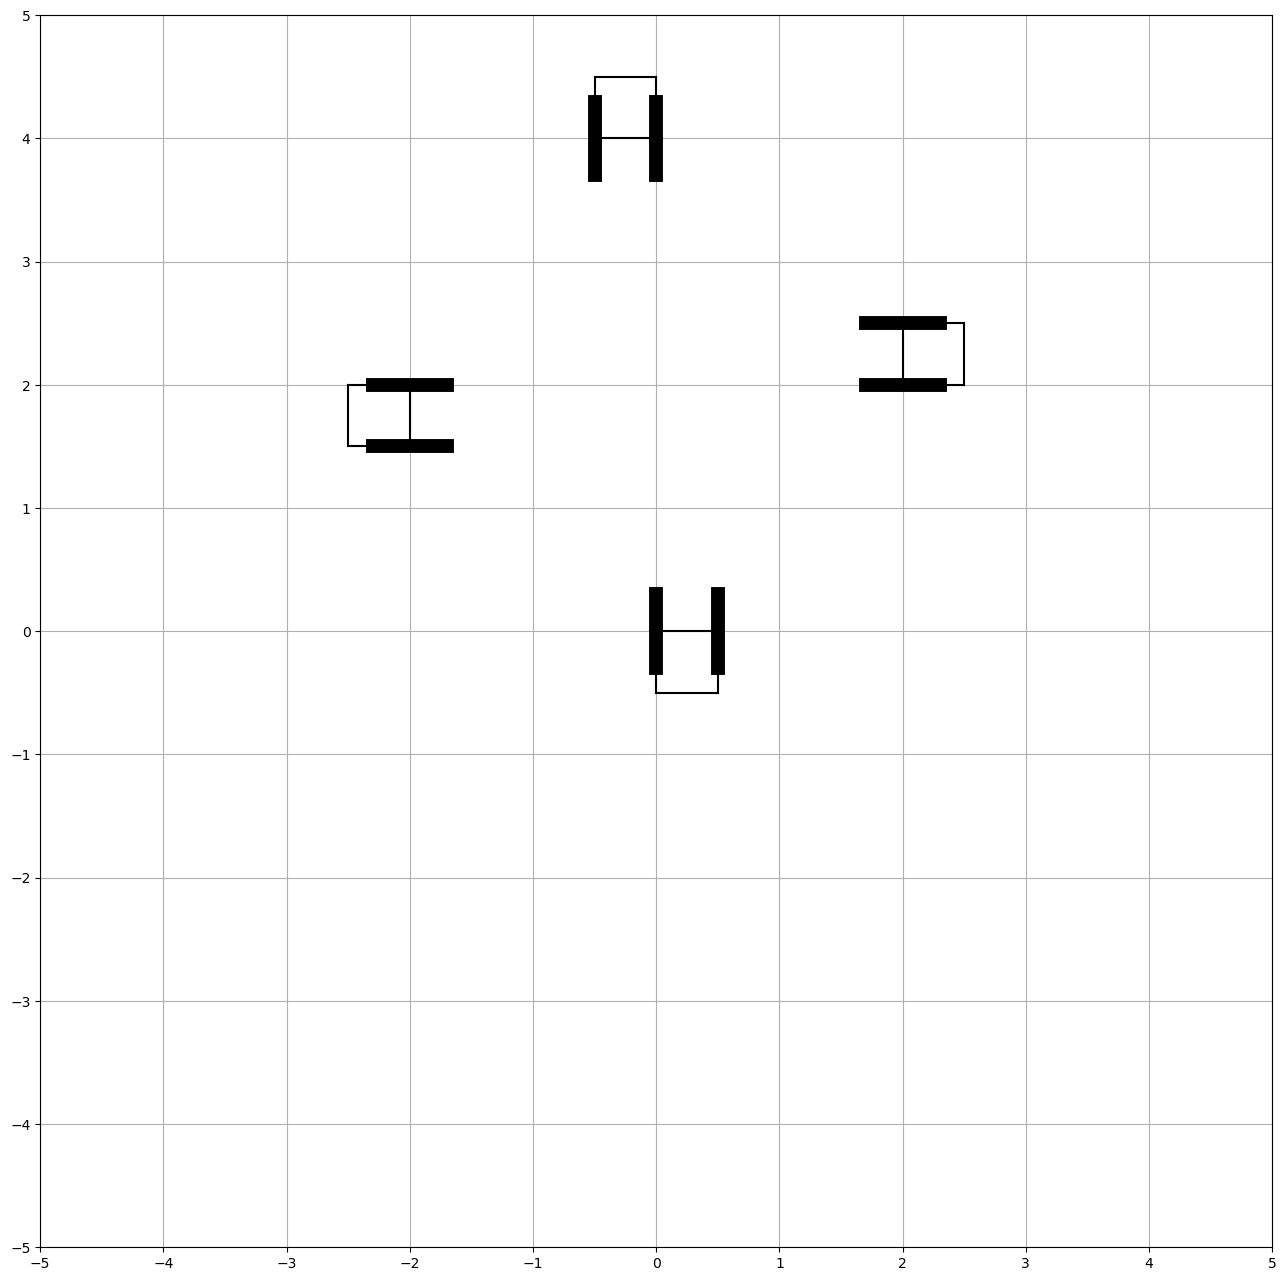

In [14]:
draw_arena(-5,5,-5,5)
draw_wheelchair(0,0,0)
draw_wheelchair(2,2,np.pi/2)
draw_wheelchair(0,4,np.pi)
draw_wheelchair(-2,2,3*np.pi/2)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:**
\begin{align*}
\dot{x} &= v_x = \frac{R_w}{2} (w_l + w_r) \cos(\theta) \\
\dot{y} &= v_y = \frac{R_w}{2} (w_l + w_r) \sin(\theta) \\
\dot{\theta} &= v_{\theta} = \frac{R_w}{L} (w_r - w_l)
\end{align*}

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:**
The system of differential equations is well-posed if it has a unique solution for any given initial condition and if the solution is continuous with respect to the initial condition and the input function. The system given in the previous question is well-posed because the right-hand sides of the differential equations are continuous functions, and the Picard-Lindelöf theorem ensures the existence and uniqueness of the solution. Furthermore, the solution is explicit and continuous with respect to the initial condition and input function, which shows that the system is well-posed.

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**
If $w_l$ and $w_r$ are constants, the system becomes autonomous, and the right-hand sides of the differential equations are continuous functions of $x$, $y$, and $\theta$. Therefore, the maximal solution associated with any initial state is global, as it cannot encounter a singularity or a boundary of the domain in finite time.\\

In general, the global existence of solutions is not guaranteed when the inputs $w_l$ and $w_r$ are arbitrary continuously differentiable functions of $(x,y,\theta)$. However, under certain conditions, such as boundedness and sufficient smoothness of the input functions and initial conditions, it may be possible to establish the existence and uniqueness of solutions for all time using techniques from the theory of partial differential equations.

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [10]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [11]:
def fun(t, xytheta):
    x, y, theta = xytheta
    w_l, w_r = omega(t, xytheta)
    v = Rw / 2 * (w_l + w_r)
    w = Rw / L * (w_r - w_l)
    x_dot = v * cos(theta)
    y_dot = v * sin(theta)
    theta_dot = w
    return array([x_dot, y_dot, theta_dot])

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [30]:
from  scipy.integrate import solve_ivp
t_span = (0, 4)
sol = solve_ivp(fun, t_span, (0,0,0), dense_output=True)
t_eval = np.linspace(0, 4, 1000)
xytheta = sol.sol(t_eval)

print("Final state: ", xytheta[:, -1])

Final state:  [1.00338726e-03 7.26851674e-04 6.28318531e+00]


🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

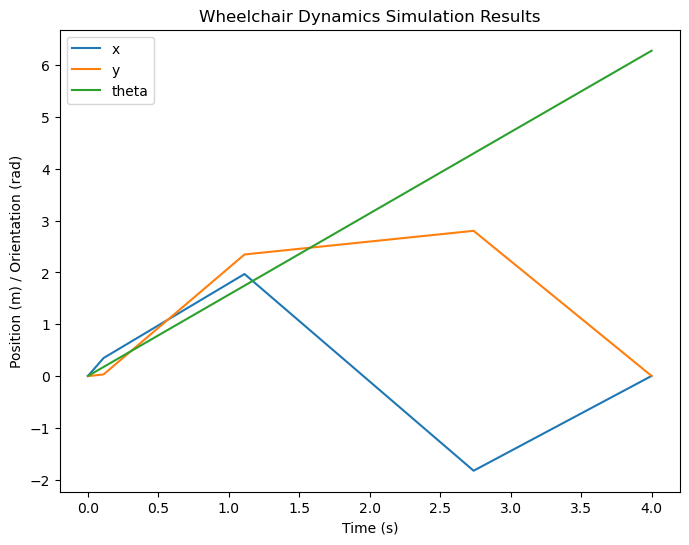

In [31]:
t = sol.t
x = sol.y[0]
y = sol.y[1]
theta = sol.y[2]

figure(figsize=(8,6))
plot(t, x, label='x')
plot(t, y, label='y')
plot(t, theta, label='theta')
xlabel('Time (s)')
ylabel('Position (m) / Orientation (rad)')
title('Wheelchair Dynamics Simulation Results')
legend()
show()

🧩 Use the simulation results to display the robot location every 0.5 second.

array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 2.73686849e+00, 4.00000000e+00])

ValueError: range() arg 3 must not be zero

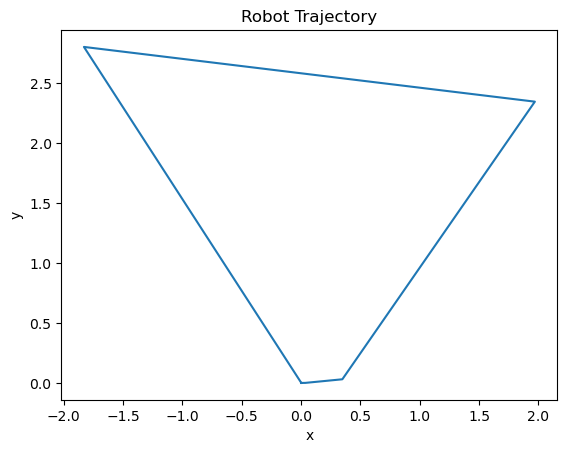

In [42]:
plot(x, y)
xlabel('x')
ylabel('y')
title('Robot Trajectory')

for i in range(0, len(t), int(0.5/10)):
    plot(x[i], y[i], 'ro')
   
show()

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [8]:
pass

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [9]:
pass